<a href="https://colab.research.google.com/github/m2ryam/Project_NLP_Python-Handwritten-Digit-Recognition/blob/main/ProjectNLP_ipynb5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Download a datasets MNIST and convert it to the desired format

In [ ]:

# Load the MNIST dataset
# Download the MNIST dataset from the Keras library, divided into two parts: training section and a test section.

(A_train, B_train), (A_test, B_test) = mnist.load_data()

# Convert the data to the desired format

A_train = A_train.reshape(-1, 28, 28, 1) / 255.0
A_test = A_test.reshape(-1, 28, 28, 1) / 255.0

#The reshap function is used to transform the shape of the training images from a two-dimensional matrix in the form (28,28).
# The value -1 automatically selects samples so that each image is 28x28 pixels in size.

11490434/11490434 [==============================] - 0s 0us/step


# Display & label pictures of Digits

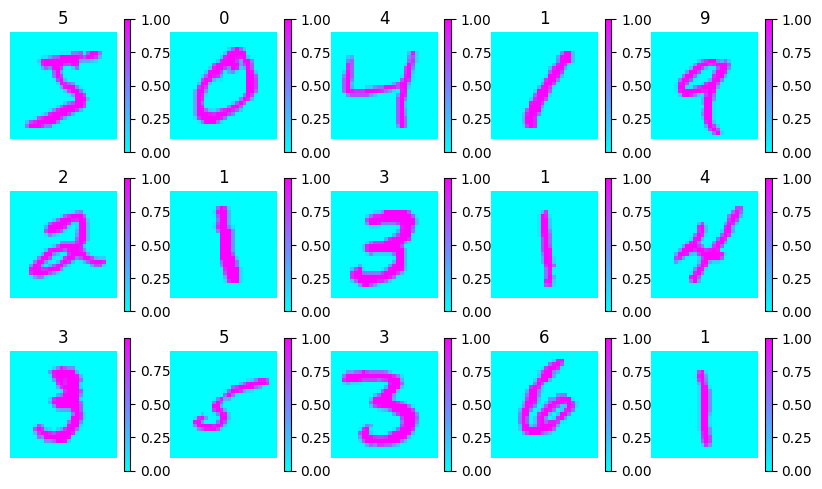

In [ ]:
plt.figure(figsize=(10, 10))    #The size of images will be a square with a size of 10x10 inches.
for i in range(15):             #for loop to iterate over the first 25 images in the training set.
    plt.subplot(5, 5, i+1)      # 5 rows and 5 columns of images are displayed.
    plt.imshow(A_train[i].reshape(28, 28), cmap='cool')  #Displays the image using the imshow function,original shape(28, 28),
                                                         #then applies the colormap using the 'cool' colormap.
    plt.title(str(B_train[i]))  #The label is converted to a string using str().
    plt.axis('off')             #Turns off the axis labels and ticks for the images.
    plt.colorbar()              #Adds a colorbar to the images.


# Build the model

In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), #20% zeroo
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])
model.summary()


#The first layer is a Conv2D layer with 32 filters of size 3x3 and ReLU activation.
#It performs 2D image convolution.The second layer is a MaxPooling2D layer that reduces
#the image size by selecting the maximum value in 2x2 regions.
#The third layer is a Flatten layer that converts the 2D image into a 1D vector.
#The fourth layer is a Dropout layer that randomly drops 20% of the units during
#training to prevent overfitting.The fifth layer is a Dense layer with 128 units
#and ReLU activation. It is fully connected.The last layer is a Dense layer with 10 units
#and a softmax activation function,which generates the probability distribution for different classes.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Specify the loss function, optimizer, and evaluation metric

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [ ]:

model.fit(A_train, B_train, epochs=12,
          validation_data=(A_test, B_test))

print("Model training has been completed!")


#fit() function trains the model on the provided training data,
# iterates over multiple epochs, and evaluates the model's performance on the validation data

Epoch 1/12
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1619 - accuracy: 0.9526 - val_loss: 0.0665 - val_accuracy: 0.9779
Epoch 2/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0497 - val_accuracy: 0.9837
Epoch 3/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0452 - val_accuracy: 0.9845
Epoch 4/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0281 - accuracy: 0.9913 - val_loss: 0.0382 - val_accuracy: 0.9887
Epoch 5/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0394 - val_accuracy: 0.9877
Epoch 6/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0420 - val_accuracy: 0.9878
Epoch 7/12
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0431 -

# Plot accuracy on training and testing data

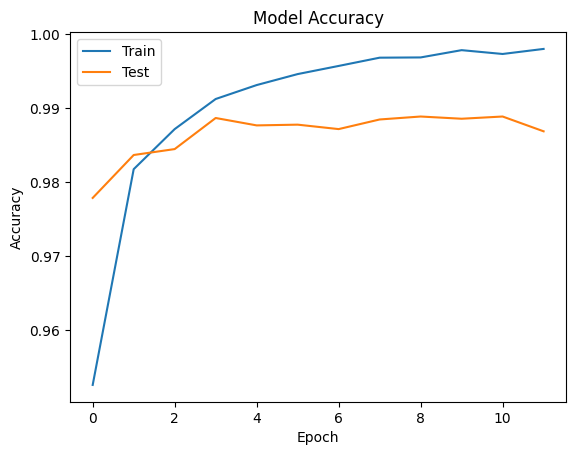

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#The code plots the training and validation accuracy of a model over epochs. It sets the title as "Model Accuracy",
#labels the x-axis as "Epoch", the y-axis as "Accuracy", adds a legend for "Train" and "Test", and displays the plot


# Evaluate the model after training

In [ ]:
loss, accuracy = model.evaluate(A_test, B_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


#The test loss and test accuracy provide insights into the model's overall performance on the evaluation dataset.

313/313 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9869
Test Loss: 0.05937274917960167
Test Accuracy: 0.9868999719619751


# Display the images with their predictions and labels

313/313 [==============================] - 1s 3ms/step


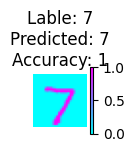

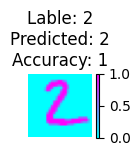

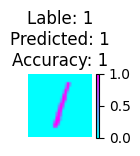

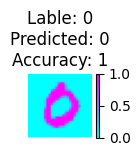

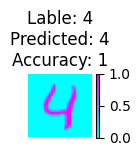

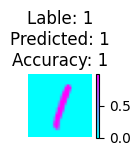

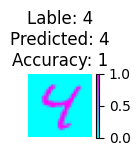

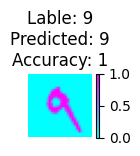

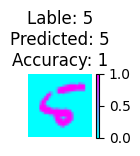

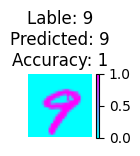

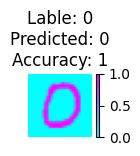

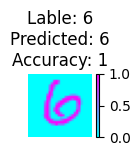

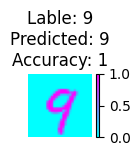

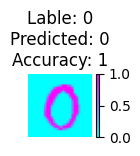

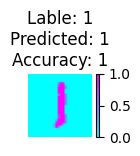

In [ ]:
# Predict on the test set
predictions = model.predict(A_test)

# Display the images with their predictions and labels
plt.figure(figsize=(5, 5))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(A_test[i].reshape(28, 28), cmap='cool')
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = B_test[i]
    accuracy = (predicted_label == true_label).astype(int)
    plt.title(f"Lable: {true_label}\nPredicted: {predicted_label}\nAccuracy: {accuracy}")
    plt.axis('off')
    plt.colorbar()
    plt.show()
